# Multiple Subplots

- Matplotlib supports *subplots* (groups of smaller axes that can exist together within a single figure.) Subplots might be insets, grids of plots, or other more complicated layouts.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### plt.axes: Subplots by Hand

- The most basic method of creating an axes is to use the ``plt.axes`` function. This creates a standard axes object that fills the entire figure.
- ``plt.axes`` also takes an optional argument that is a list of four numbers representing ``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 (bottom left) to 1 (top right) of the figure.
- For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

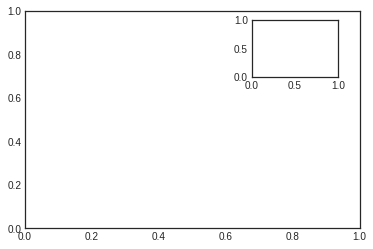

In [2]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

- The object-oriented equivalent of this command is ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

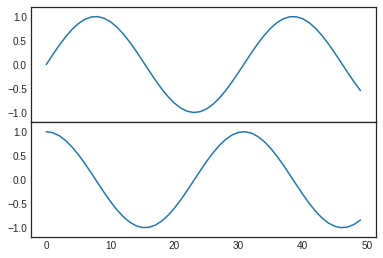

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],                 ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

- We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

### plt.subplot: Simple Grids of Subplots

- Matplotlib has several convenience routines to create aligned columns or rows of subplots.
- The simplest is ``plt.subplot()``, which creates a single subplot within a grid. It takes three integer arguments - #rows, #columns, & the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

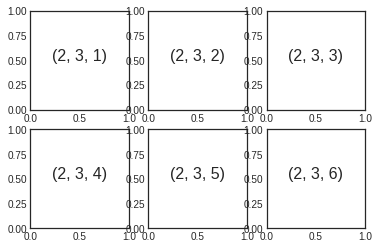

In [4]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=16, ha='center')

- ``plt.subplots_adjust`` can adjust the spacing between these plots. The following code uses the equivalent object-oriented command, ``fig.add_subplot()``:

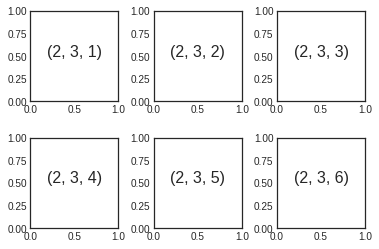

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=16, ha='center')

- We used the ``hspace`` and ``wspace`` arguments of ``plt.subplots_adjust``, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

### plt.subplots: The Whole Grid in One Go

- ``plt.subplots()`` creates a full grid of subplots in a single line, returning them in a NumPy array. The arguments are the #rows and #columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.
- Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

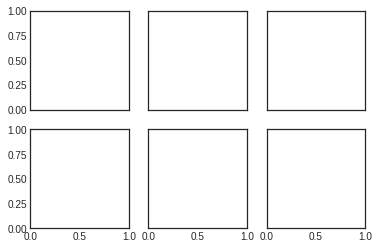

In [6]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

- By specifying ``sharex`` and ``sharey`` we've automatically removed inner labels on the grid to make the plot cleaner.
- The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

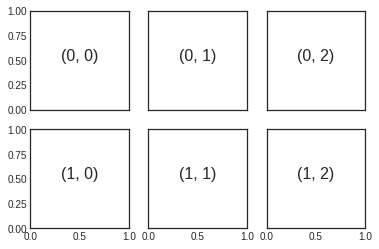

In [7]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=16, ha='center')
fig

- ``plt.subplots()`` is more consistent with Python's conventional 0-based indexing.

### plt.GridSpec: More Complicated Arrangements

- To go beyond a regular grid to subplots that span multiple rows and columns, ``plt.GridSpec()`` is the best tool.
- For example, a gridspec for a grid of two rows and three columns with some specified width and height space looks like this:

In [8]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

- From this we can specify subplot locations and extents using Python slicing syntax:

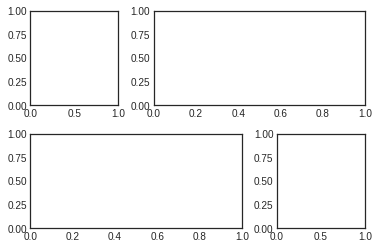

In [9]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

- This is often used to create multi-axes histogram plots.

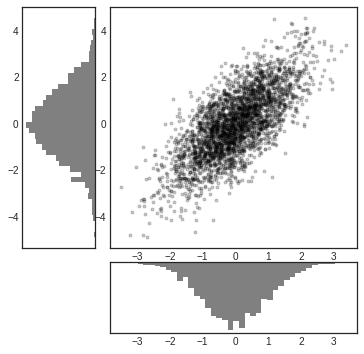

In [10]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()